# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile sum.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing sum.cpp


In [ ]:
!g++ sum.cpp -o sum
!./sum

2

3
5

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Overwriting output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Overwriting input2.txt


In [ ]:
%%writefile output2.txt
4

Overwriting output2.txt


In [ ]:
!./sum < input1.txt

12

In [ ]:
!./sum < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

4 7
11


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product1.cpp


In [ ]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

3
1 3 4
12


### Test 1: lagest input numbers 200000 200000 in the input

In [ ]:
%%writefile input1.txt
6
1 3 200000 9 200000 23

Overwriting input1.txt


In [ ]:
!./max_pairwise_product1 < input1.txt

/bin/bash: ./max_pairwise_product1: No such file or directory


In [ ]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product2.cpp


In [ ]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

1
2
3
4
82
3
9
39998800005


### Test 2  generate a tests file with the maximun n 200000 numbres and measure time

In [2]:
#generacion de los 200000 números.
import numpy
import pandas

def numeros():
  file1 = open("input1.txt","w")
  file1.write('200000 \n')
  for i in range(200000):

    x = numpy.random.randint(0,200000,1)

    #print(type(x))

    string = str(x[0])+' '
    #print(string)
    file1.write(string)
  file1.close()
numeros()

### Efficient solution 

In [10]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <time.h>
using namespace std;

int main() {
    clock_t begin = clock();                     /*Aqui esta la medicion del tiempo gastado*/


    
    int n;
    cin >> n;
    long long numa = 0;
    long long numb = 0;
    long long entrada;
    for (int i = 0; i < n; i++) {
        cin >> entrada;
        if(entrada > numb)
            if(entrada > numa){
                numb = numa;
                numa = entrada;
            }else{
                numb = entrada;
            }
    }
    cout << "Maximo producto: " <<numa * numb;
    clock_t end = clock();
    double time_spent = (double)(end - begin) / CLOCKS_PER_SEC;
    cout << " Tiempo gastado: " << time_spent;
    return 0;
}


Overwriting max_pairwise_product2.cpp


In [11]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

Maximo producto: 39999600001 Tiempo gastado: 0.08381

Stress tests 

Measure with test file of the maximun n 200000 numbres 

## Python

In [21]:
import numpy
import pandas

n = input()
num_a=0
num_b=0
for i in range(int(n)):
  entrada= int(input())
  if entrada>num_b:
    if entrada>num_a:
      num_b=num_a
      num_a=entrada
    else:
      num_b=entrada

print(num_a*num_b)

5
3
5
9
4
6
54


## Captura de cursera
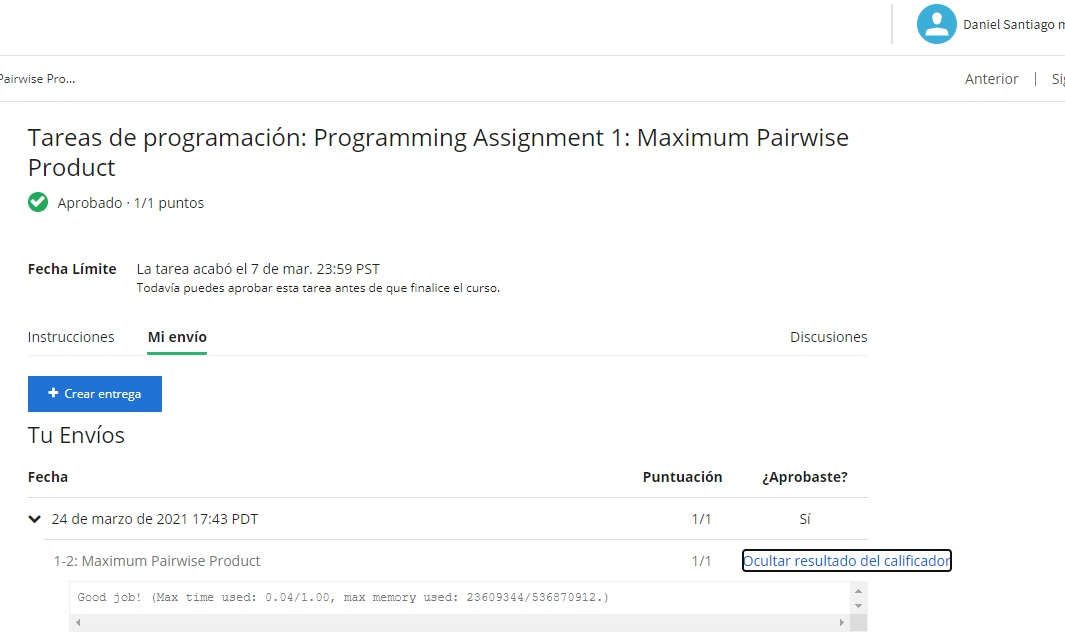